---

Applied Statistics

# Worksheet: Railway Field Laboratory 3 – Flirt and Rail Pads

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Now we consider the train type Flirt and check again the assumption for the TEL80 values.
#### a) Filter the data according to the following criteria and transform the variable speed:
* MQ 2.1
* 3.0m microphone
* `date` < "2023-05-18" 
* `zugtyp` Flirt

In [2]:
data_raw = pd.read_pickle("railway.pkl")
# MQ2.1 and 3.0m-micro and zugtyp Flirt only
data2 = data_raw.query('location_name == "MQ21" and sensor_position == "3.0m" and zugtyp=="Flirt" and date < "2023-05-18"').copy()
data2['lg_speed_80'] = np.log10(data2.speed / 80)
data2.head()

,passby_id,location_name,sensor_position,tel80,tel,speed,starttime,date,zugtyp,zw,lg_speed_80
train_id,,,,,,,,,,,
310377,309996,MQ21,3.0m,78.529370,87.496460,119.370330,2023-05-11 20:01:37.566000+02:00,2023-05-11,Flirt,alte_zw,0.173806
310363,310023,MQ21,3.0m,79.448320,88.294480,118.282060,2023-05-11 17:19:39.478000+02:00,2023-05-11,Flirt,alte_zw,0.169829
310428,310358,MQ21,3.0m,77.589480,86.482050,118.677460,2023-05-11 23:33:17.682000+02:00,2023-05-11,Flirt,alte_zw,0.171278
310411,310165,MQ21,3.0m,79.976494,87.629250,108.008600,2023-05-11 00:47:24.500000+02:00,2023-05-11,Flirt,alte_zw,0.130368
310408,310252,MQ21,3.0m,81.916510,87.677986,93.518654,2023-05-11 21:19:11.610000+02:00,2023-05-11,Flirt,alte_zw,0.067808


#### b) Fit a model with TEL as the explained variable and the transformed speed as the explanatory variable. What do you notice?

In [3]:
m3 = smf.ols(formula="tel ~ lg_speed_80", data=data2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tel   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.02
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           6.51e-05
Time:                        13:16:33   Log-Likelihood:                -3002.6
No. Observations:                1850   AIC:                             6009.
Df Residuals:                    1848   BIC:                             6020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      85.7740      0.189    454.722      0.000      85.404      86.144
lg_speed_80     4.6733      1.167      4.003      0.000       2.384       6.963
==============================================================================
Omnibus:                       11.839   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.649
Skew:                          -0.066   Prob(JB):                     0.000400
Kurtosis:                       3.431   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c) Look at the regression plot, the QQ plot and the residuals vs. fits plot for this model. What do you notice? Have the assumptions been met?

<Axes: xlabel='lg_speed_80', ylabel='tel'>

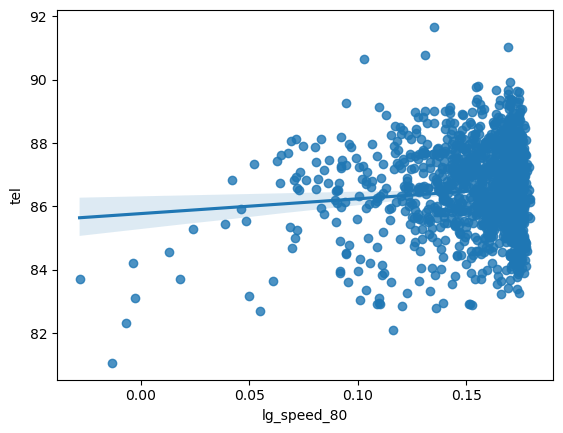

In [4]:
sns.regplot(y="tel", x="lg_speed_80", data=data2)

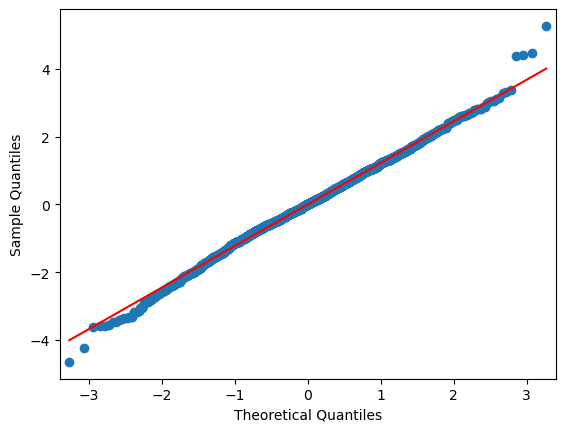

In [5]:
sm.qqplot(m3.resid,line='s')
None

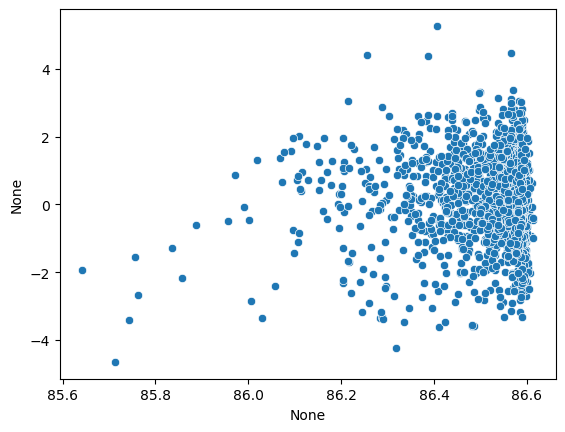

In [6]:
sns.scatterplot(x=m3.fittedvalues, y=m3.resid)
None

#### d) What do you conclude from the result?

* The coefficient for lg_speed_80 is very small (much smaller than 30).
* The "Residuals vs. Fitted" plot shows that the relationship between lg_speed_80 and TEL is not linear. The curve flattens out.
* The TEL80 value should therefore not be used for the Flirt. At least not for measurements from the railway field laboratory".
* On the other hand, the residuals follow a normal distribution very nicely except for a few outliers.

### 2. We are now investigating the effect of the new rail pads for the IC2000.
#### a) Filter the data according to the following criteria:
* MQ 2.1
* 3.0m microphone
* No restrictions on the `date`.
* `zugtyp` IC2000

In [7]:
# MQ2.1 and 3.0m-micro and zugtyp IC2000 only
data3 = data_raw.query('location_name == "MQ21" and sensor_position == "3.0m" and zugtyp == "IC2000"').copy()
data3['lg_speed_80'] = np.log10(data3.speed / 80)
data3.head()

,passby_id,location_name,sensor_position,tel80,tel,speed,starttime,date,zugtyp,zw,lg_speed_80
train_id,,,,,,,,,,,
388091,388143,MQ21,3.0m,73.10771,82.122154,119.83381,2023-10-01 23:25:14.811000+02:00,2023-10-01,IC2000,neue_zw,0.175489
426802,426801,MQ21,3.0m,74.16469,83.179380,119.84031,2023-11-18 10:11:59.974000+01:00,2023-11-18,IC2000,neue_zw,0.175513
387875,387593,MQ21,3.0m,72.21417,81.234180,119.89304,2023-10-01 14:41:10.579000+02:00,2023-10-01,IC2000,neue_zw,0.175704
426848,426852,MQ21,3.0m,74.23640,83.216400,119.52529,2023-11-18 11:11:53.957000+01:00,2023-11-18,IC2000,neue_zw,0.174370
388013,387340,MQ21,3.0m,73.76134,82.776460,119.86046,2023-10-01 13:41:15.671000+02:00,2023-10-01,IC2000,neue_zw,0.175586


#### b) Fit a model with TEL as the explained variable and the transformed speed and zw as explanatory variables.
zw is a binary variable with the values "neue_zw": new rail pads and "alte_zw": old rail pads

In [8]:
m3 = smf.ols(formula="tel ~ lg_speed_80 + zw", data=data3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tel   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     980.4
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:16:35   Log-Likelihood:                -6909.1
No. Observations:                4672   AIC:                         1.382e+04
Df Residuals:                    4669   BIC:                         1.384e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.2345      0.128    629.097      0.000      79.984      80.485
zw[T.neue_zw]    -1.2374      0.039    -31.848      0.000      -1.314      -1.161
lg_speed_80      22.2457      0.718     30.982      0.000      20.838      23.653
==============================================================================
Omnibus:                     1292.083   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10697.373
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                      10.089   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c) What is the effect of the new rail pads?

* The estimated average TEL value for the new rail pads is 1.5978 dB lower than that for the old rail pads.

#### d) Use a QQ plot and a residuals vs. fits plot to check whether the requirements for the model are met.

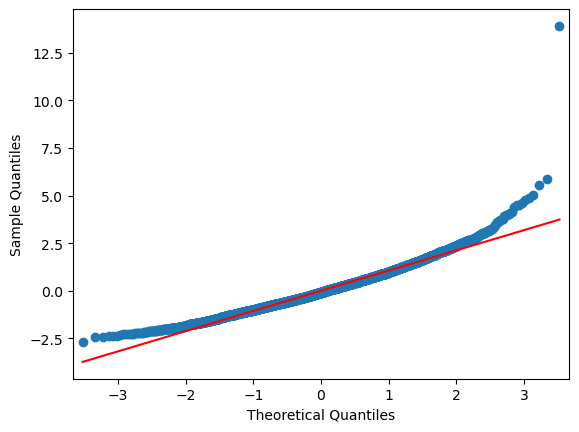

In [9]:
sm.qqplot(m3.resid,line='s')
None

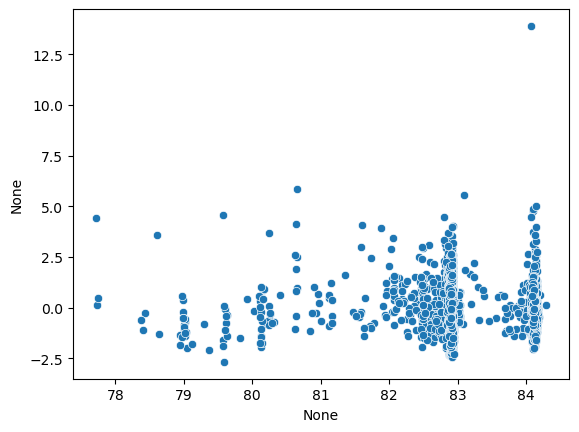

In [10]:
sns.scatterplot(x=m3.fittedvalues, y=m3.resid)
None

We again see the skewed distribution and the outlier.